<a href="https://colab.research.google.com/github/Mahmoud74xx/SYNC-intern-s/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

In [5]:
# Install Kaggle package
!pip install kaggle
# Upload your Kaggle API token file (kaggle.json) when prompted
from google.colab import files
files.upload()  # Select and upload your kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahmoud74a","key":"600cfc704bbb9b1e3e1b67b2df104b50"}'}

In [6]:
# Move the uploaded token to the required location and set appropriate permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Set the directory where you want to download the Kaggle data
import os
kaggle_data_dir = '/content/kaggle_data'  # Change this to your preferred directory
os.makedirs(kaggle_data_dir, exist_ok=True)

# Change the working directory to the specified directory
os.chdir(kaggle_data_dir)

# Download data using Kaggle API - replace 'abdallahalidev/plantvillage-dataset' with actual dataset name
!kaggle datasets download -d abdallahalidev/plantvillage-dataset -p {kaggle_data_dir} --unzip


100% 2.04G/2.04G [01:14<00:00, 32.8MB/s]
100% 2.04G/2.04G [01:14<00:00, 29.4MB/s]


In [7]:
# Constants
path = '/content/kaggle_data/plantvillage dataset/color'
train_ds , test_ds = keras.utils.image_dataset_from_directory(
    path ,
    image_size=(224,224),
    batch_size=32 ,
    seed = 123 ,
    validation_split=.2,
    subset='both'
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


In [9]:
classes = train_ds.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

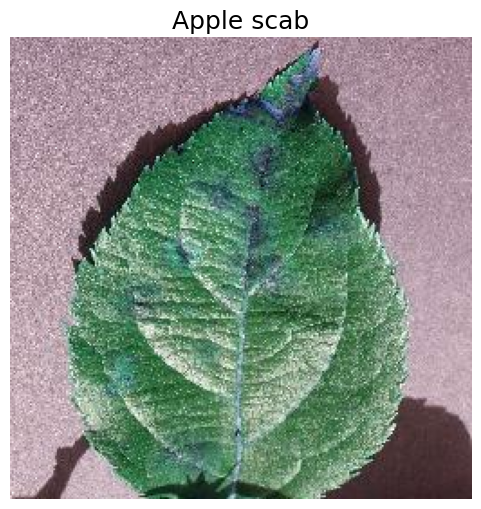

In [ ]:
image = cv2.imread("/content/kaggle_data/plantvillage dataset/color/Apple___Apple_scab/0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Scab 2966.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Apple scab',size =18 )
plt.axis('off')
plt.show()

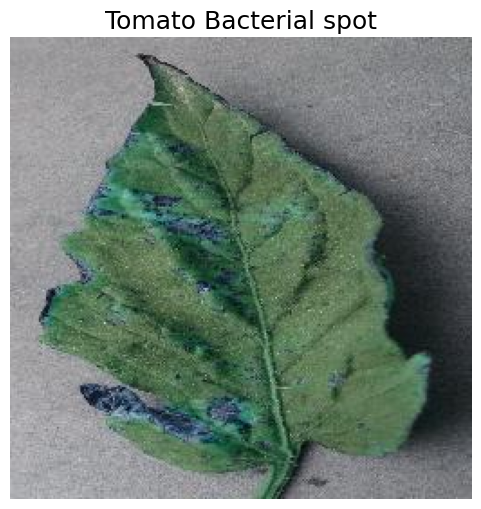

In [ ]:
image = cv2.imread("/content/kaggle_data/plantvillage dataset/color/Tomato___Bacterial_spot/00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Tomato Bacterial spot',size =18 )
plt.axis('off')
plt.show()

In [ ]:


model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2))                     ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='sigmoid')

])

In [ ]:
# Compile the model
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [ ]:
history = model.fit(train_ds , epochs = 20)

Epoch 1/20
1358/1358 [==============================] - 134s 88ms/step - loss: 1.7751 - accuracy: 0.4979
Epoch 2/20
1358/1358 [==============================] - 117s 86ms/step - loss: 0.6537 - accuracy: 0.7928
Epoch 3/20
1358/1358 [==============================] - 118s 87ms/step - loss: 0.4100 - accuracy: 0.8668
Epoch 4/20
1358/1358 [==============================] - 118s 87ms/step - loss: 0.3117 - accuracy: 0.8971
Epoch 5/20
1358/1358 [==============================] - 117s 86ms/step - loss: 0.2500 - accuracy: 0.9164
Epoch 6/20
1358/1358 [==============================] - 117s 86ms/step - loss: 0.2144 - accuracy: 0.9288
Epoch 7/20
1358/1358 [==============================] - 117s 86ms/step - loss: 0.1784 - accuracy: 0.9401
Epoch 8/20
1358/1358 [==============================] - 116s 85ms/step - loss: 0.1647 - accuracy: 0.9446
Epoch 9/20
1358/1358 [==============================] - 116s 85ms/step - loss: 0.1464 - accuracy: 0.9512
Epoch 10/20
1358/1358 [==============================] 

In [ ]:
# Save the trained model
model.save('/content/drive/My Drive/trained_modelPlantDisease.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


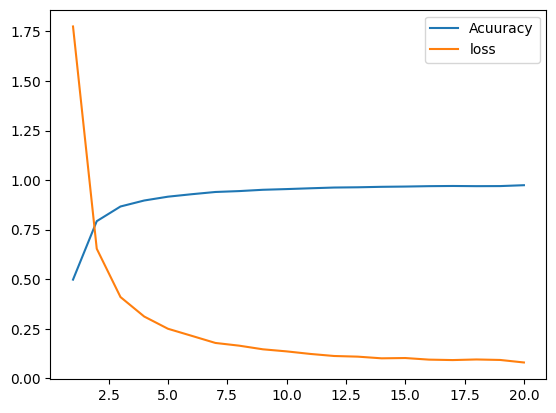

340/340 [==============================] - 18s 53ms/step - loss: 0.2764 - accuracy: 0.9262


[0.27644774317741394, 0.9262498617172241]

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,21)
plt.plot(epochs , accuracy , label = 'Acuuracy')
plt.plot(epochs , loss , label = 'loss')
plt.legend()
plt.show()
model.evaluate(test_ds)

In [2]:
# Load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/trained_modelPlantDisease.h5')


In [3]:
def img_to_pred(image):
    image = image.numpy()
    image = tf.expand_dims(image, 0)
    return image

1/1 [==============================] - 0s 77ms/step


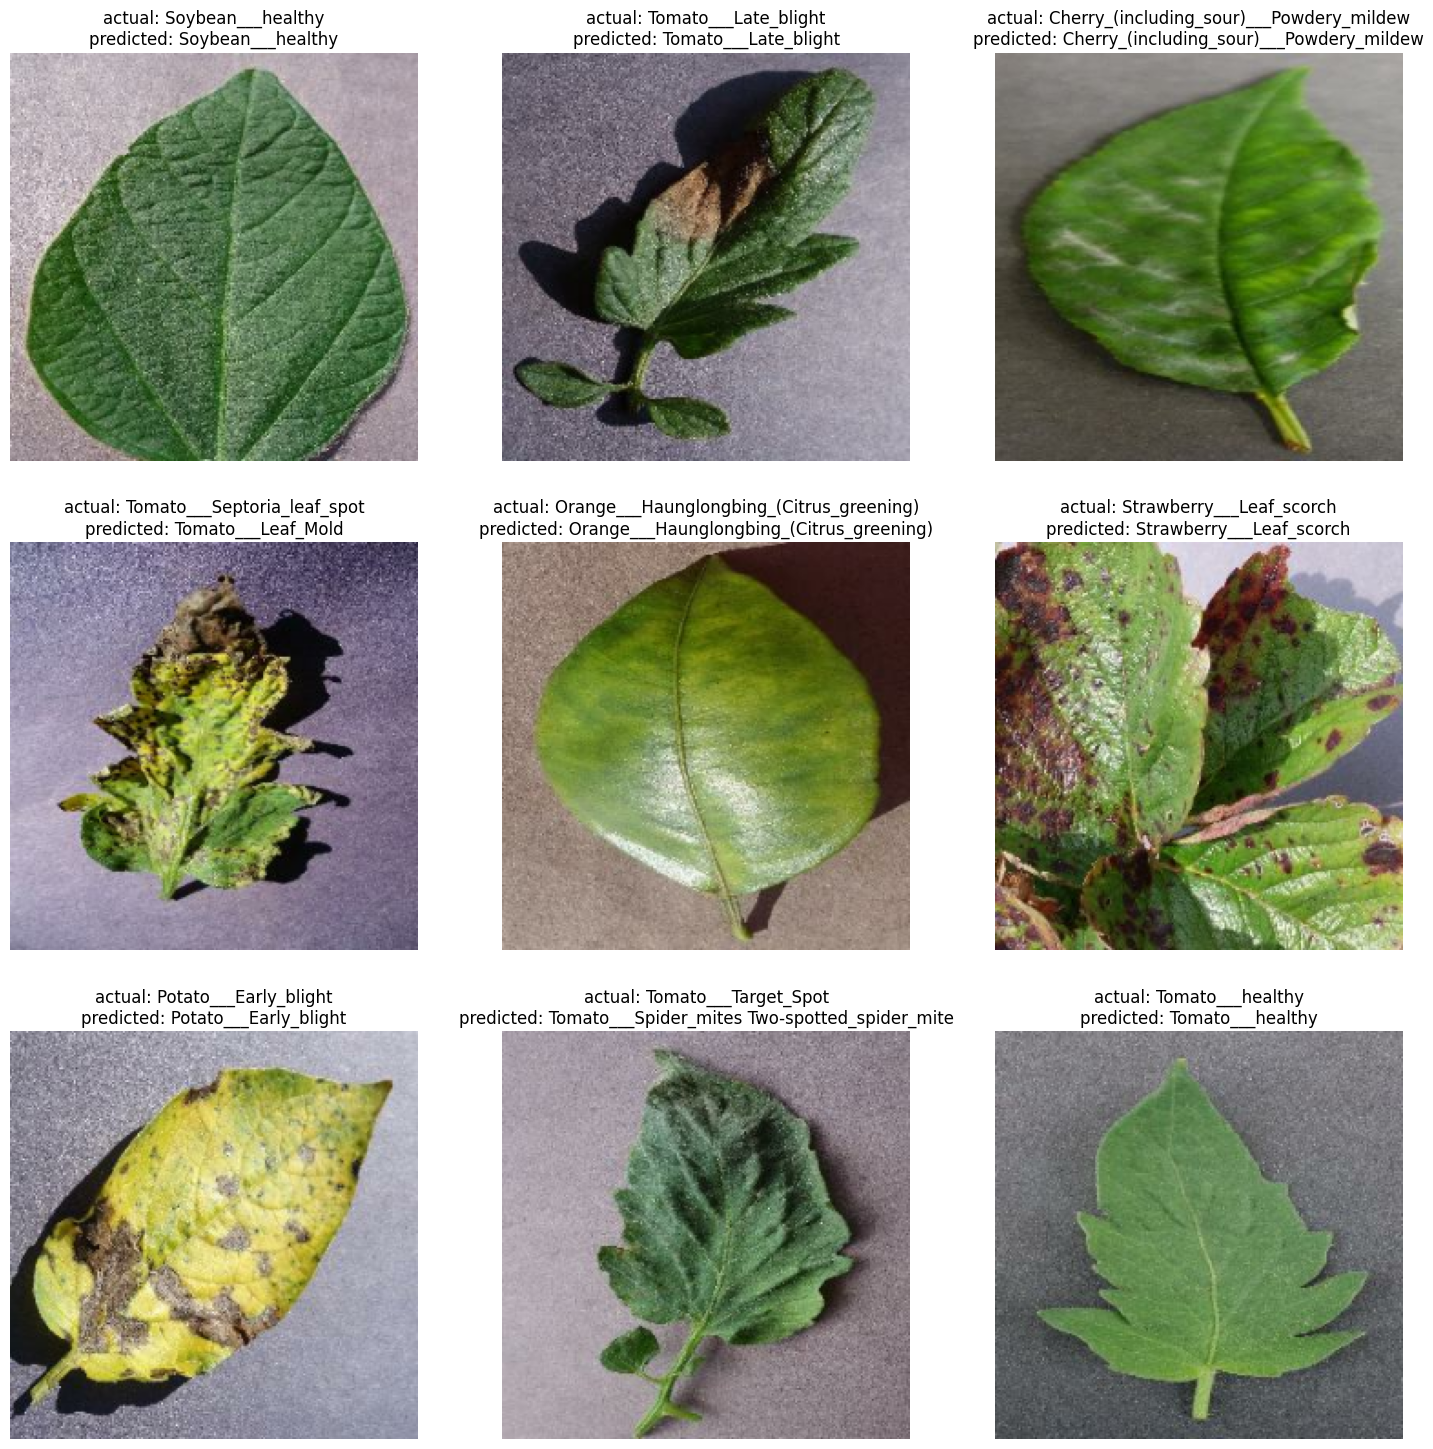

In [10]:
import random

# Example: Predicting classes for images in a random batch from the test dataset
plt.figure(figsize=(18, 18))

# Get a random batch index from the test dataset
random_batch_index = random.randint(0, len(test_ds))

for images, labels in test_ds.skip(random_batch_index).take(1):  # take a random batch
    for i in range(1, 10):  # or adjust this range to the number of images you want to display/predict
        plt.subplot(3, 3, i)
        plt.imshow(images[i].numpy().astype('uint32'))
        plt.axis('off')
        actual = classes[labels[i]]

        # Use the loaded model for prediction
        predict = classes[np.argmax(loaded_model.predict(img_to_pred(images[i])))]

        plt.title(f"actual: {actual}\npredicted: {predict}")
plt.show()
